In [1]:
#Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pymsaviz import MsaViz
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord


In [2]:
def GC_content(strand):
    return (strand.count("G")+strand.count("C"))/len(strand) * 100

In [9]:
#Preprocessing
#Importing input data

#Removing ChrM and ChrY
data.drop(data[data['chrom'].isin(['chrY','chrM'])].index,inplace=True,axis=0) 
data = pd.read_excel('CHANGEseq.xlsx')
data=data.rename(columns={'distance':'mismatch','chromStart:chromEnd':'genomic_coordinate'})
data.drop('Unnamed: 7',axis=1,inplace=True)
data.dropna(inplace=True)
for x in data.groupby('name'):
    df=x[1]
    if (df['mismatch']==0).any() == False:
        print(x[0])
    #print((df['mismatch']==0).any())
    #display(df[df['mismatch']==0])
data.drop(data[data['name']=='TRBC1_site_2'].index,inplace=True)

# Creating a dataframe for each individual target (gRNA)

names = data['name'].unique()
dfs = {}
for name in names:
    dfs[name] = data.loc[data['name']==name]

# Sorting dataframes based on number of Off-targets found 
dfs_data = dict(sorted(dfs.items(),key =lambda x:len(x[1]),reverse=True))
#Printing target name, number of OTS
#Printing On target sequence 
tname_tcoordinate={} #target name: target genomic coordinate

for name,df in dfs_data.items():
    print(name," : ",len(dfs[name]))
    target_seq = dfs[name]['target'].unique()[0]
    print(f"target sequence:{target_seq}")
    print(f"GC content of protospacer:{GC_content(dfs[name]['target'].unique()[0][:-3])}")

    tname_tcoordinate[name]=df[df['mismatch']==0]['genomic_coordinate'].unique()[0]

    median=df['CHANGEseq_reads'].median()
    mean=df['CHANGEseq_reads'].mean()
    print(f"reads median:{median}")
    print(f"reads mean:{mean}")
    #print(len(target_seq))
    print()

TRBC1_site_2
LAG3_site_6  :  61415
target sequence:GGTGGTGTGGGCCCAGGAGGNGG
GC content of protospacer:75.0
reads median:156.0
reads mean:208.30080599202148

PDCD1_site_8  :  13494
target sequence:GAGCAGGGCTGGGGAGAAGGNGG
GC content of protospacer:70.0
reads median:22.0
reads mean:115.08003557136504

AAVS1_site_11  :  9180
target sequence:GGTGAGGGAGGAGAGATGCCNGG
GC content of protospacer:65.0
reads median:36.0
reads mean:218.34237472766884

LAG3_site_10  :  7406
target sequence:GGGCTGCAGGGGAGCTGGGCNGG
GC content of protospacer:80.0
reads median:30.0
reads mean:243.04334323521468

LAG3_site_9  :  6847
target sequence:GAAGGCTGAGATCCTGGAGGNGG
GC content of protospacer:60.0
reads median:34.0
reads mean:278.83686285964654

PDCD1_site_10  :  6838
target sequence:GGAGAAGGTGGGGGGGTTCCNGG
GC content of protospacer:70.0
reads median:32.0
reads mean:213.14360924246856

PDCD1_site_12  :  6531
target sequence:GAGAAGGTGGGGGGGTTCCANGG
GC content of protospacer:65.0
reads median:40.0
reads mean:254.30225

In [10]:
data.columns

Index(['chrom', 'chromStart', 'chromEnd', 'name', 'CHANGEseq_reads', 'strand',
       'offtarget_sequence', 'genomic_coordinate', 'mismatch', 'target'],
      dtype='object')

In [11]:
data['target'].apply(lambda x: len(x)).unique()

array([23], dtype=int64)

In [12]:
data[data['offtarget_sequence'].apply(lambda x: len(x))==24]

chrom  chromStart  chromEnd          name  CHANGEseq_reads strand  \
105     chr17    64713955  64713979  AAVS1_site_1               12      -   
169     chr15    71729891  71729915  AAVS1_site_1                8      +   
210     chr15    71092240  71092264  AAVS1_site_1                6      -   
216     chr17    68086208  68086232  AAVS1_site_1                6      +   
232      chr1    71982331  71982355  AAVS1_site_1                6      +   
...       ...         ...       ...           ...              ...    ...   
200603   chr2      866360    866384  TRBC1_site_1               42      +   
200796  chr17    34128054  34128078  TRBC1_site_1               20      -   
200853   chr1     2029897   2029921  TRBC1_site_1               16      -   
200941   chr3    52439041  52439065  TRBC1_site_1               12      -   
201011   chrY    14687321  14687345  TRBC1_site_1               10      -   

              offtarget_sequence         genomic_coordinate  mismatch  \
105     GTCACCACTCTCTGTCCCTAGGAG  chr17:64713956-64713979:-         3   
169     GTCACACAACCGTGTCCCTTGGGG  chr15:71729892-71729915:+         4   
210     TTCACCAACTCCTGTCCCTCGCGG  chr15:71092241-71092264:-         3   
216     GTCACCACTCTCTGTCCCTAGCAG  chr17:68086209-68086232:+         3   
232     CTCACCATCTCCTGTCCCTAAAGG   chr1:71982332-71982355:+         4   
...                          ...                        ...       ...   
200603  GAACAAGGCTATTCCCATCCCAGG       chr2:866361-866384:+         4   
200796  GTACAAGGTGTTAGGCACCCGTGG  chr17:34128055-34128078:-         4   
200853  GACCACAGGTGTTCCCATGCGGGG     chr1:2029898-2029921:-         4   
200941  GAGCTAGGTGGTTCCCACCCCAGG   chr3:52439042-52439065:-         4   
201011  GAACAGGGATGTTCCCACCCCAGG   chrY:14687322-14687345:-         3   

                         target  
105     GTCACCAATCCTGTCCCTAGNGG  
169     GTCACCAATCCTGTCCCTAGNGG  
210     GTCACCAATCCTGTCCCTAGNGG  
216     GTCACCAATCCTGTCCCTAGNGG  
232     GTCACCAATCCTGTCCCTAGNGG  
...                         ...  
200603  GAACAAGGTGTTCCCACCCGNGG  
200796  GAACAAGGTGTTCCCACCCGNGG  
200853  GAACAAGGTGTTCCCACCCGNGG  
200941  GAACAAGGTGTTCCCACCCGNGG  
201011  GAACAAGGTGTTCCCACCCGNGG  

[3092 rows x 10 columns]

In [13]:
data.describe()

chromStart      chromEnd  CHANGEseq_reads       mismatch
count  2.011240e+05  2.011240e+05    201124.000000  201124.000000
mean   7.594480e+07  7.594483e+07       179.958255       5.397829
std    5.628783e+07  5.628783e+07       650.215729       0.810928
min    4.330000e+02  4.560000e+02         6.000000       0.000000
25%    3.129538e+07  3.129540e+07        14.000000       5.000000
50%    6.450697e+07  6.450699e+07        44.000000       6.000000
75%    1.129270e+08  1.129271e+08       168.000000       6.000000
max    2.489221e+08  2.489222e+08    129678.000000       6.000000

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201124 entries, 0 to 201171
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   chrom               201124 non-null  object
 1   chromStart          201124 non-null  int64 
 2   chromEnd            201124 non-null  int64 
 3   name                201124 non-null  object
 4   CHANGEseq_reads     201124 non-null  int64 
 5   strand              201124 non-null  object
 6   offtarget_sequence  201124 non-null  object
 7   genomic_coordinate  201124 non-null  object
 8   mismatch            201124 non-null  int64 
 9   target              201124 non-null  object
dtypes: int64(4), object(6)
memory usage: 16.9+ MB


In [15]:
sum(data['mismatch']==0)

109

In [16]:
data['target'].nunique()

109

In [17]:
data['name'].nunique()

109

In [18]:
import numpy as np
data['log_CHANGEseq_reads']=np.log2(data['CHANGEseq_reads']+1)
data['log_CHANGEseq_reads']

0         9.079485
1         8.299208
2         8.016808
3         7.826548
4         7.033423
            ...   
201167    2.807355
201168    2.807355
201169    2.807355
201170    2.807355
201171    2.807355
Name: log_CHANGEseq_reads, Length: 201124, dtype: float64

<Axes: >

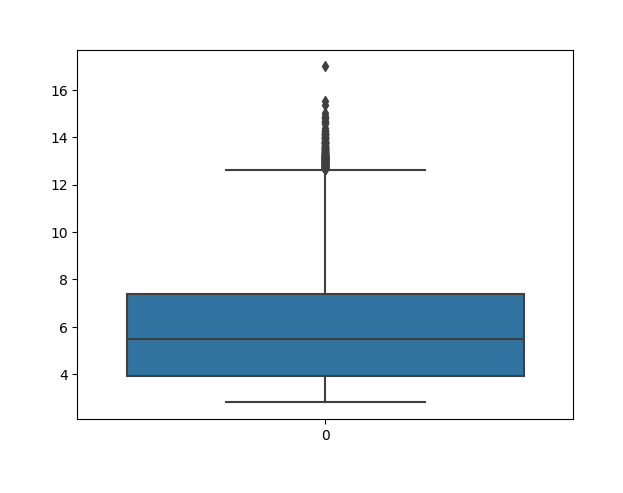

In [19]:
sns.boxplot(data['log_CHANGEseq_reads'])

<Axes: xlabel='log_CHANGEseq_reads', ylabel='Count'>

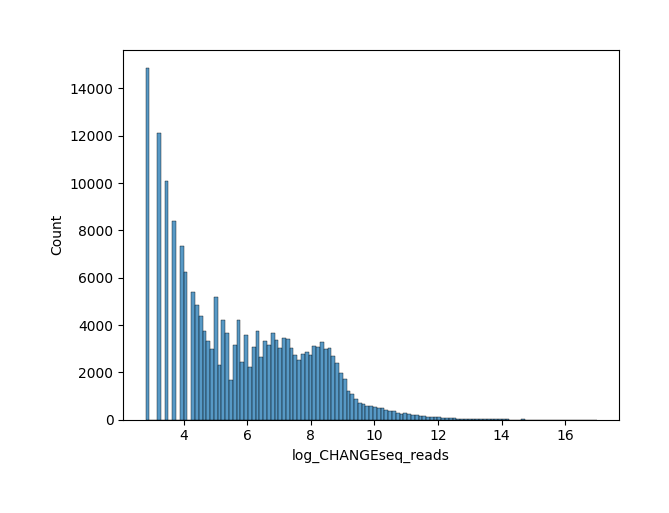

In [20]:
sns.histplot(data['log_CHANGEseq_reads'])

In [21]:
data['CHANGEseq_reads'].max()

129678

In [22]:
len(data)

201124

In [23]:
sum(data['CHANGEseq_reads']<100)

129979

In [24]:
data.drop(data[data['name']=='TRBC1_site_2'].index,inplace=True)

In [25]:
data['PAM']=data['offtarget_sequence'].apply(lambda x: 'N'+x[-2:])
data['PAM'].value_counts()

PAM
NGG    159447
NAG     21305
NGA      9453
NTG      4822
NGC      2592
NGT      1213
NCG       907
NAA       501
NCA       190
NAC       132
NTA       121
NAT       108
NCT       105
NTT        80
NTC        76
NCC        70
NG-         2
Name: count, dtype: int64

In [26]:
data['PAM'].value_counts()/ sum(data['PAM'].value_counts())

PAM
NGG    0.792780
NAG    0.105930
NGA    0.047001
NTG    0.023975
NGC    0.012888
NGT    0.006031
NCG    0.004510
NAA    0.002491
NCA    0.000945
NAC    0.000656
NTA    0.000602
NAT    0.000537
NCT    0.000522
NTT    0.000398
NTC    0.000378
NCC    0.000348
NG-    0.000010
Name: count, dtype: float64

In [27]:
filtered_data=data[data['CHANGEseq_reads']<100]

In [28]:
ref = r'D:\bioinfo\refs\hg19\hg19.fasta'


In [29]:
#Getting Chromosome Lengths From reference genome
from Bio import SeqIO 
ref = r'D:\bioinfo\refs\hg19\hg19.fasta'
chroms = SeqIO.parse(open(ref),'fasta')
c=0
chromLengths=[]
for chrom in chroms:
    
    print(chrom.description.split(':')[-2])
    chromLengths+=[int(chrom.description.split(':')[-2])]
    c+=1
    if c==23:
        break
genome=SeqIO.parse(open(ref),'fasta')

249250621
243199373
198022430
191154276
180915260
171115067
159138663
146364022
141213431
135534747
135006516
133851895
115169878
107349540
102531392
90354753
81195210
78077248
59128983
63025520
48129895
51304566
155270560


In [30]:
# Creating a dataframe for each individual target (gRNA)

names = data['name'].unique()
dfs = {}
for name in names:
    dfs[name] = data.loc[data['name']==name]

# Sorting dataframes based on number of Off-targets found 
dfs_sorted = dict(sorted(dfs.items(),key =lambda x:len(x[1]),reverse=True))
#Printing target name, number of OTS
#Printing On target sequence 
tname_tcoordinate={} #target name: target genomic coordinate

for name,df in dfs_sorted.items():
    print(name," : ",len(dfs[name]))
    target_seq = dfs[name]['target'].unique()[0]
    print(f"target sequence:{target_seq}")
    print(f"GC content of protospacer:{GC_content(dfs[name]['target'].unique()[0][:-3])}")

    tname_tcoordinate[name]=df[df['mismatch']==0]['genomic_coordinate'].unique()[0]

    median=df['CHANGEseq_reads'].median()
    mean=df['CHANGEseq_reads'].mean()
    print(f"reads median:{median}")
    print(f"reads mean:{mean}")
    #print(len(target_seq))
    print()


LAG3_site_6  :  61415
target sequence:GGTGGTGTGGGCCCAGGAGGNGG
GC content of protospacer:75.0
reads median:156.0
reads mean:208.30080599202148

PDCD1_site_8  :  13494
target sequence:GAGCAGGGCTGGGGAGAAGGNGG
GC content of protospacer:70.0
reads median:22.0
reads mean:115.08003557136504

AAVS1_site_11  :  9180
target sequence:GGTGAGGGAGGAGAGATGCCNGG
GC content of protospacer:65.0
reads median:36.0
reads mean:218.34237472766884

LAG3_site_10  :  7406
target sequence:GGGCTGCAGGGGAGCTGGGCNGG
GC content of protospacer:80.0
reads median:30.0
reads mean:243.04334323521468

LAG3_site_9  :  6847
target sequence:GAAGGCTGAGATCCTGGAGGNGG
GC content of protospacer:60.0
reads median:34.0
reads mean:278.83686285964654

PDCD1_site_10  :  6838
target sequence:GGAGAAGGTGGGGGGGTTCCNGG
GC content of protospacer:70.0
reads median:32.0
reads mean:213.14360924246856

PDCD1_site_12  :  6531
target sequence:GAGAAGGTGGGGGGGTTCCANGG
GC content of protospacer:65.0
reads median:40.0
reads mean:254.30225080385853

LA

In [61]:
data['name'].nunique()

109

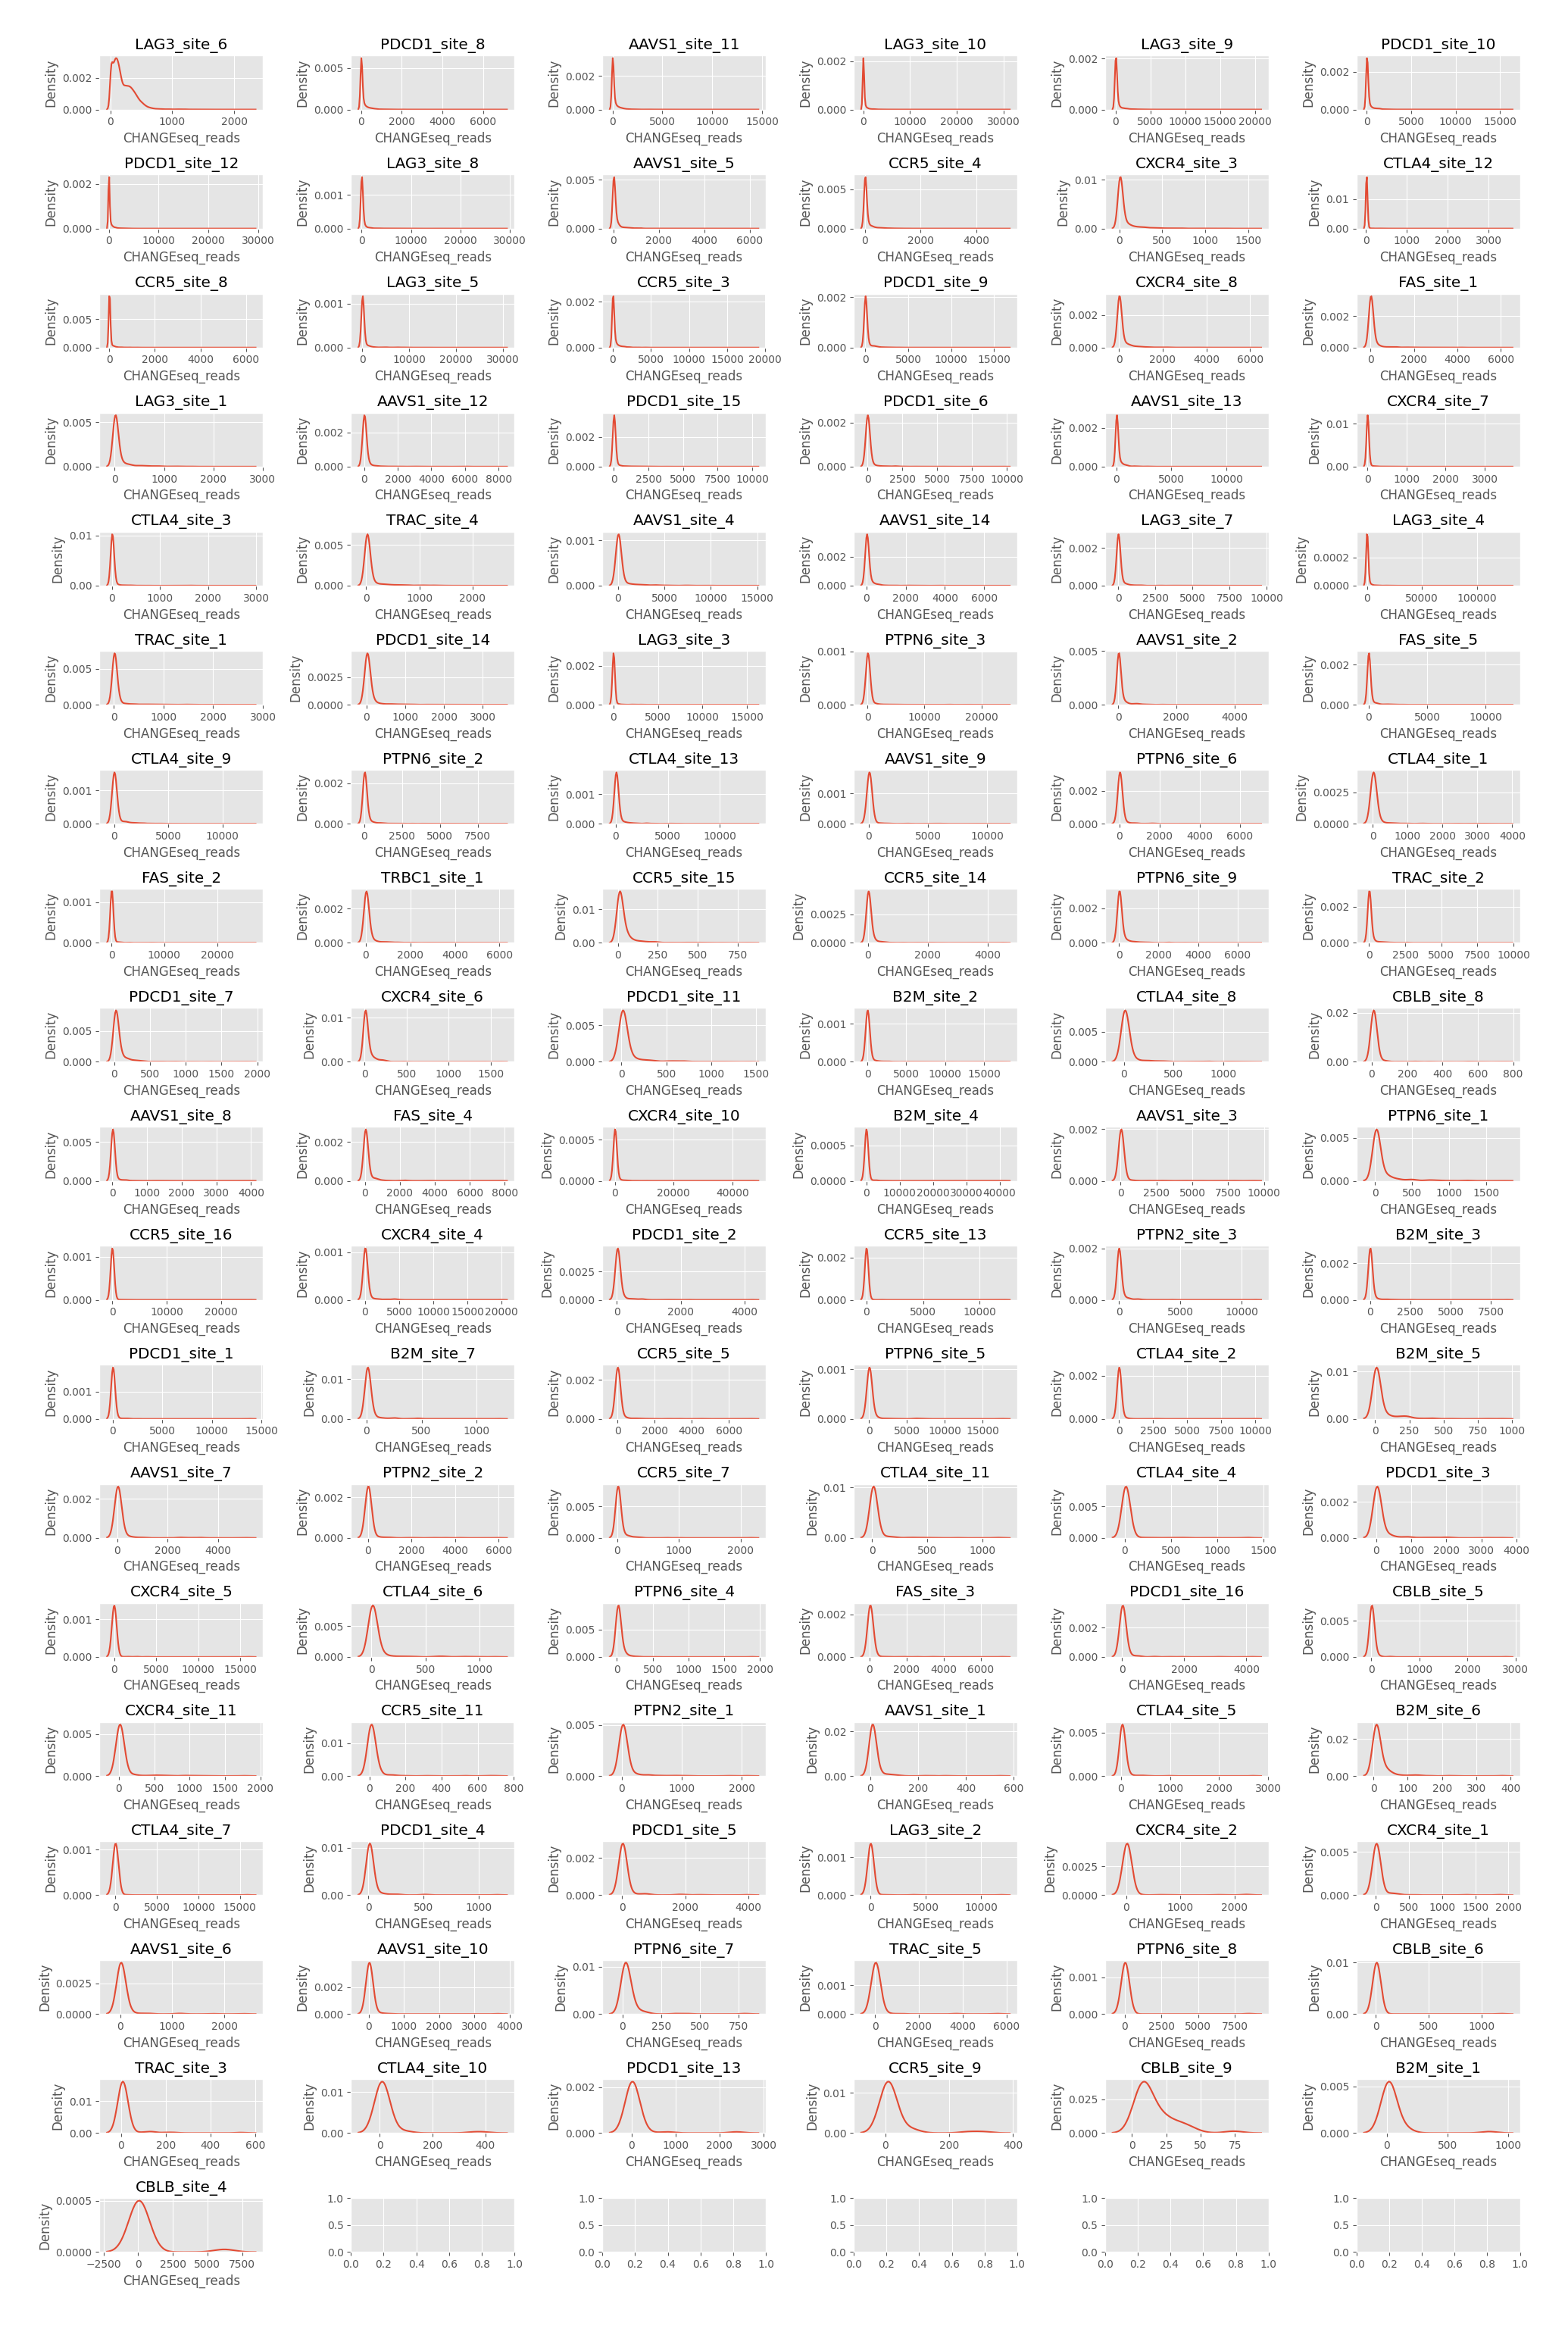

In [31]:
plt.style.use('ggplot')

#plt.style.use('seaborn')

fig,axs=plt.subplots(19,6,figsize=(20,30))
axs=axs.ravel()
i=0
for df in dfs_sorted.values():
    #print(df)
    name =df['name'].unique()[0]
    #print(name)
    axs[i].set_title(name)
    sns.kdeplot(x='CHANGEseq_reads',data=df,ax=axs[i])
    
    i+=1
    
fig.tight_layout()
#fig.savefig(fr"plots\readcounts_distance.png", format='png', dpi=1200)

plt.show()


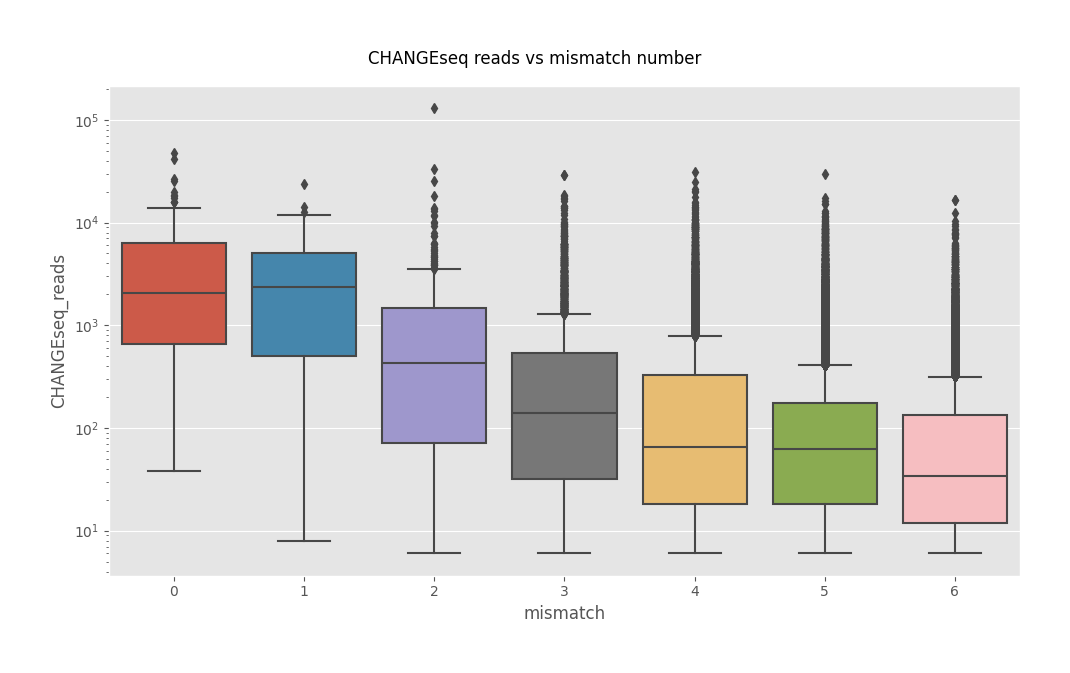

In [32]:
from sklearn.metrics import r2_score
from scipy.stats import linregress
plt.style.use('ggplot')
#plt.style.use('seaborn')

i=0
fig,axs = plt.subplots(figsize=(10,6))

sns.boxplot(y='CHANGEseq_reads',x='mismatch',data=data)
axs.set(yscale='log')
fig.suptitle('CHANGEseq reads vs mismatch number')
fig.tight_layout()
fig.savefig(fr"plots\changeseq\mismatch_number.png", format='png', dpi=1200)

plt.show()



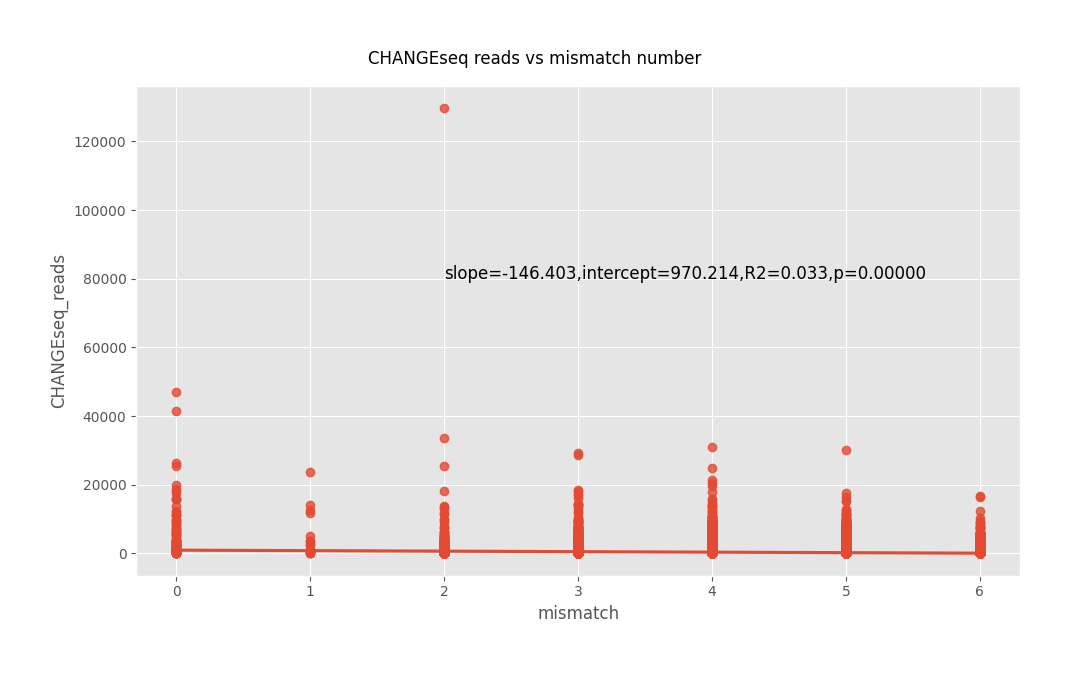

In [57]:
from sklearn.metrics import r2_score
from scipy.stats import linregress
plt.style.use('ggplot')
#plt.style.use('seaborn')

i=0
fig,axs = plt.subplots(figsize=(10,6))
sns.regplot(y='CHANGEseq_reads',x='mismatch',data=data)
slope, intercept, r_value, p_value, std_err = linregress(data['mismatch'], data['CHANGEseq_reads'])
r_squared = r_value**2
plt.text(2,80000,f"slope={slope:.3f},intercept={intercept:.3f},R2={r_squared:.3f},p={p_value:.5f}",size='large')
fig.suptitle('CHANGEseq reads vs mismatch number')
fig.tight_layout()
#fig.savefig(fr"plots\readcounts_distance.png", format='png', dpi=1200)

plt.show()



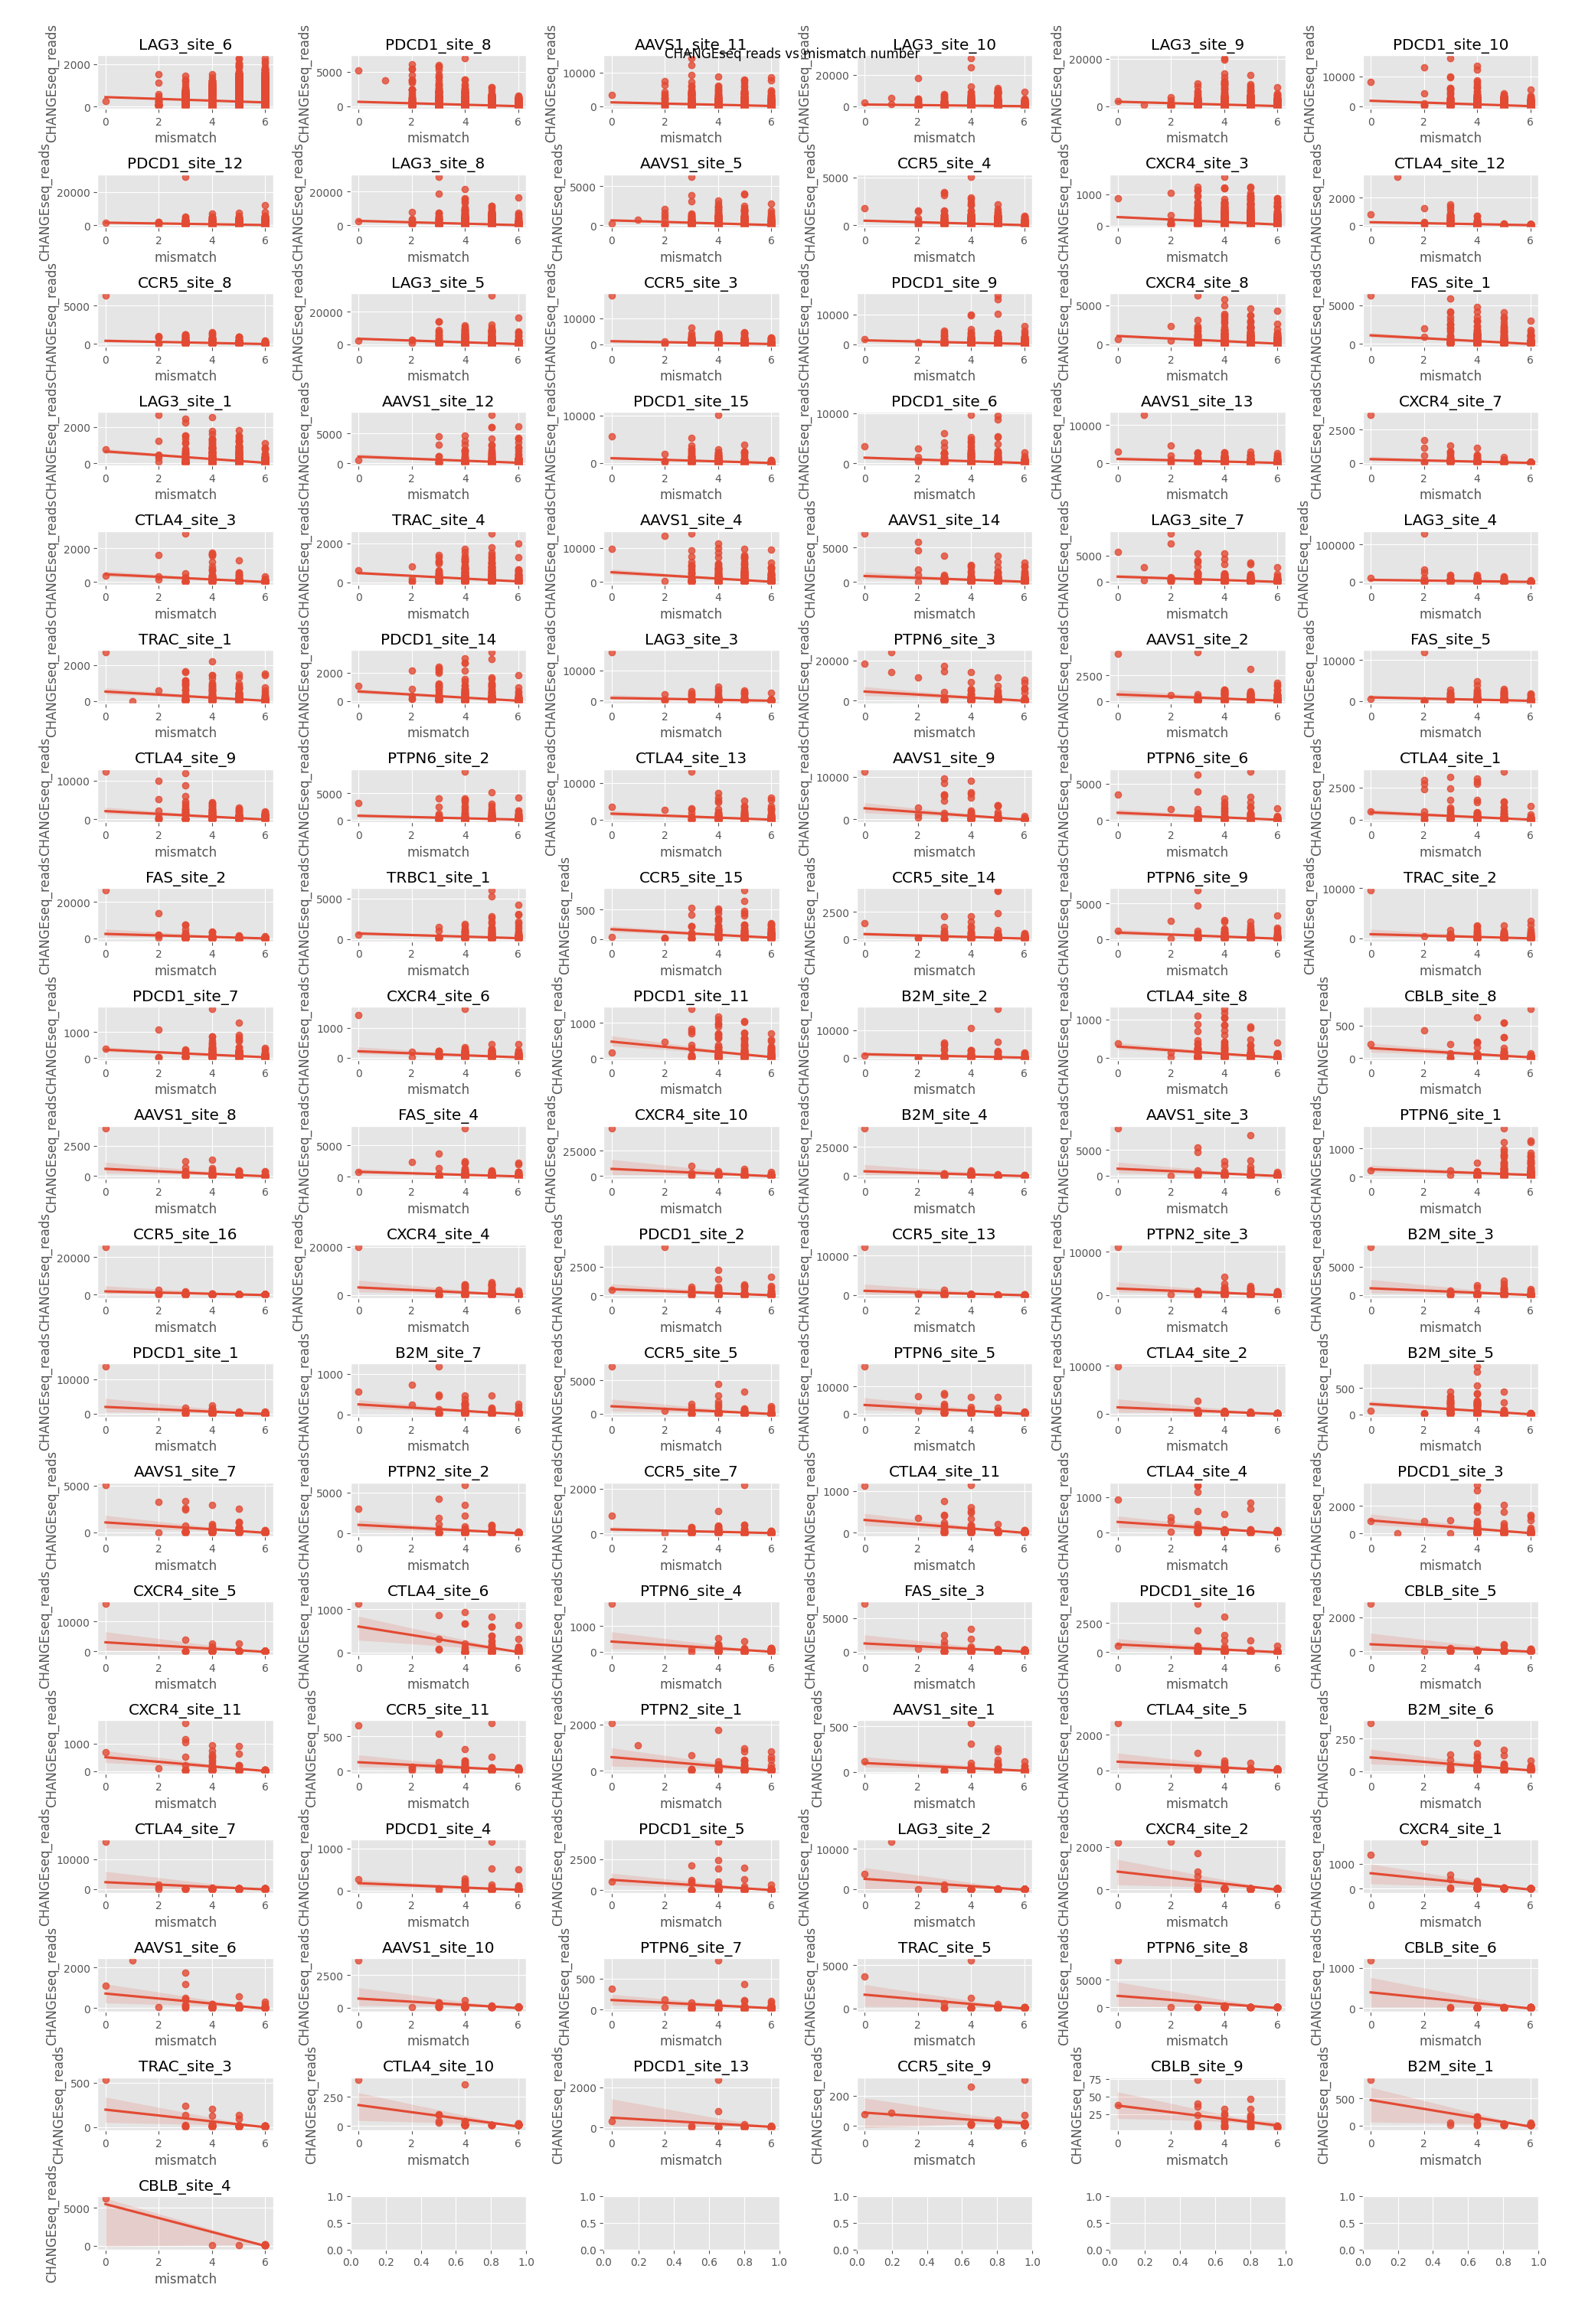

In [60]:

plt.style.use('ggplot')
#plt.style.use('seaborn')

fig,axs=plt.subplots(19,6,figsize=(20,30))
axs=axs.ravel()
i=0
for df in dfs_sorted.values():
    #print(df)
    name =df['name'].unique()[0]
    #print(name)
    axs[i].set_title(name)
    sns.regplot(y='CHANGEseq_reads',x='mismatch',data=df,ax=axs[i])
    
    i+=1
fig.suptitle('CHANGEseq reads vs mismatch number')
fig.tight_layout()
#fig.savefig(fr"plots\readcounts_distance.png", format='png', dpi=1200)

plt.show()



In [31]:
data=filtered_data

In [32]:
data

chrom  chromStart   chromEnd          name  CHANGEseq_reads strand  \
8        chr4    25171629   25171652  AAVS1_site_1               98      +   
9        chr4     1205543    1205566  AAVS1_site_1               88      +   
10      chr15    98193314   98193337  AAVS1_site_1               82      +   
11      chr19    12870785   12870808  AAVS1_site_1               78      +   
12       chrX   155132957  155132980  AAVS1_site_1               78      -   
...       ...         ...        ...           ...              ...    ...   
201167   chr9   118785214  118785237  TRBC1_site_1                6      -   
201168   chr9   131060857  131060880  TRBC1_site_1                6      +   
201169   chr9     2639899    2639922  TRBC1_site_1                6      +   
201170   chr9    94712728   94712751  TRBC1_site_1                6      -   
201171   chrX    27741844   27741867  TRBC1_site_1                6      +   

             offtarget_sequence          genomic_coordinate  mismatch  \
8       TAAAGCAATCCTGTCCCCAGAGG    chr4:25171630-25171652:+         5   
9       TCCCGCAATCCTGTCCCCAGAGG      chr4:1205544-1205566:+         5   
10      CTCTGTTATCCTGTCCCTAGGGG   chr15:98193315-98193337:+         5   
11      CCCACTAACCCTGTCCCTATGGG   chr19:12870786-12870808:+         5   
12      ACGACCAACCCTGTCCCTTGGGG  chrX:155132958-155132980:-         5   
...                         ...                         ...       ...   
201167  GAAGAAGGAGCCCCCACATGGGG  chr9:118785215-118785237:-         6   
201168  GAACCAGGTGGTCCAGCTCCAGG  chr9:131060858-131060880:+         6   
201169  GGCCAGTGTGTTCCCAGCCGATG      chr9:2639900-2639922:+         6   
201170  GAACAAGGAGTTTTAAGCAGGGG    chr9:94712729-94712751:-         6   
201171  AAACATAGTGTTCCCACCTAGGA    chrX:27741845-27741867:+         6   

                         target  log_CHANGEseq_reads  PAM  
8       GTCACCAATCCTGTCCCTAGNGG             6.629357  NGG  
9       GTCACCAATCCTGTCCCTAGNGG             6.475733  NGG  
10      GTCACCAATCCTGTCCCTAGNGG             6.375039  NGG  
11      GTCACCAATCCTGTCCCTAGNGG             6.303781  NGG  
12      GTCACCAATCCTGTCCCTAGNGG             6.303781  NGG  
...                         ...                  ...  ...  
201167  GAACAAGGTGTTCCCACCCGNGG             2.807355  NGG  
201168  GAACAAGGTGTTCCCACCCGNGG             2.807355  NGG  
201169  GAACAAGGTGTTCCCACCCGNGG             2.807355  NTG  
201170  GAACAAGGTGTTCCCACCCGNGG             2.807355  NGG  
201171  GAACAAGGTGTTCCCACCCGNGG             2.807355  NGA  

[129979 rows x 12 columns]

In [ ]:

plt.style.use('ggplot')

#print(name)
chroms=data.groupby('chrom')
fig,axs=plt.subplots(3,8,figsize=(20,10),sharey=True)
axs=axs.ravel()

for i in range(23):
    if i==22:
        chrom='chr'+'X'
    else:
        chrom= 'chr'+str(i+1)
    if chrom not in chroms.indices:
        axs[i].xaxis.grid(False)
        continue
    else:
        #print(chrom[0])
        axs[i].xaxis.grid(False)

        #axs[i].set_xlabel('chromStart')
        axs[i].set_title(chrom)


        df=chroms.get_group(chrom)
        pos_df=df[df['strand']=='+']
        neg_df=df[df['strand']=='-']
        axs[i].set_xlim(1,chromLengths[i])
        axs[i].set(yscale='log')
        sns.scatterplot(x='chromStart',y='CHANGEseq_reads',data=pos_df,label='+ strand',ax=axs[i],
                        color='red')
        sns.scatterplot(x='chromStart',y='CHANGEseq_reads',data=neg_df,label='- strand',ax=axs[i],
                        color='blue')



fig.delaxes(axs[23])
fig.suptitle(f'CHANGE-seq reads against genomic coordinates:')

fig.tight_layout()
fig.savefig(fr"plots\changeseq\all_gRNAs.png", format='png', dpi=300)

plt.show()


In [ ]:
data

In [ ]:

plt.style.use('ggplot')
for df in dfs_sorted.values():
    #print(df)
    
    name =df['name'].unique()[0]
    #print(name)
    chroms=df.groupby('chrom')
    fig,axs=plt.subplots(3,8,figsize=(20,10),sharey=True)
    axs=axs.ravel()
    
    tchromStart= int(tname_tcoordinate[name].split(':')[1].split('-')[0])
    tchrom= tname_tcoordinate[name].split(':')[0]
    
    for i in range(23):
        if i==22:
            chrom='chr'+'X'
        else:
            chrom= 'chr'+str(i+1)
        if chrom not in chroms.indices:
            axs[i].xaxis.grid(False)
            continue
        else:
            #print(chrom[0])
            axs[i].xaxis.grid(False)

            #axs[i].set_xlabel('chromStart')
            axs[i].set_title(chrom)
            if chrom==tchrom:
                #rint('y')
                #print(f'ontarget:{tchromStart}')
                #print()
                #print(dfs['PDCD1_site_8']['chromStart'])
                axs[i].axvline(tchromStart,color='green',linestyle='-',label='on-target')
                    
            df=chroms.get_group(chrom)
            pos_df=df[df['strand']=='+']
            neg_df=df[df['strand']=='-']
            axs[i].set_xlim(1,chromLengths[i])
            axs[i].set(yscale='log')
            sns.scatterplot(x='chromStart',y='CHANGEseq_reads',data=pos_df,label='+ strand',ax=axs[i],
                            color='red')
            sns.scatterplot(x='chromStart',y='CHANGEseq_reads',data=neg_df,label='- strand',ax=axs[i],
                            color='blue')
            
    
    
    fig.delaxes(axs[23])
    fig.suptitle(f'CHANGE-seq reads against genomic coordinates: {name}')

    fig.tight_layout()
    fig.savefig(fr"plots\changeseq\{name}.png", format='png', dpi=300)

    plt.show()


In [ ]:
# Only the OTs with CHANGEseq reads above the mean. 
plt.style.use('ggplot')
for df in dfs_sorted.values():
    #print(df)
    df= df[df["CHANGEseq_reads"]>data['CHANGEseq_reads'].mean()]
    name =df['name'].unique()[0]
    #print(name)
    chroms=df.groupby('chrom')
    fig,axs=plt.subplots(3,8,figsize=(20,10),sharey=True)
    axs=axs.ravel()
    
    tchromStart= int(tname_tcoordinate[name].split(':')[1].split('-')[0])
    tchrom= tname_tcoordinate[name].split(':')[0]
    
    for i in range(23):
        if i==22:
            chrom='chr'+'X'
        else:
            chrom= 'chr'+str(i+1)
        if chrom not in chroms.indices:
            axs[i].xaxis.grid(False)
            continue
        else:
            #print(chrom[0])
            axs[i].xaxis.grid(False)

            #axs[i].set_xlabel('chromStart')
            axs[i].set_title(chrom)
            if chrom==tchrom:
                #rint('y')
                #print(f'ontarget:{tchromStart}')
                #print()
                #print(dfs['PDCD1_site_8']['chromStart'])
                axs[i].axvline(tchromStart,color='green',linestyle='-',label='on-target')
                    
            df=chroms.get_group(chrom)
            pos_df=df[df['strand']=='+']
            neg_df=df[df['strand']=='-']
            axs[i].set_xlim(1,chromLengths[i])
            axs[i].set(yscale='log')
            sns.scatterplot(x='chromStart',y='CHANGEseq_reads',data=pos_df,label='+ strand',ax=axs[i],
                            color='red')
            sns.scatterplot(x='chromStart',y='CHANGEseq_reads',data=neg_df,label='- strand',ax=axs[i],
                            color='blue')
            
    
    
    fig.delaxes(axs[23])
    fig.suptitle(f'CHANGE-seq reads against genomic coordinates: {name}')

    fig.tight_layout()
    #fig.savefig(fr"plots\{name}.png", format='png', dpi=300)

    plt.show()


In [34]:
data['CHANGEseq_reads'].mean()

28.99165249771117

In [ ]:

plt.style.use('ggplot')
for df in dfs_sorted.values():
    #print(df)
    
    name =df['name'].unique()[0]
    #print(name)
    chroms=df.groupby('chrom')
    fig,axs=plt.subplots(24,1,figsize=(20,25),sharex=True,sharey=True)
    axs=axs.ravel()
    
    tchromStart= int(tname_tcoordinate[name].split(':')[1].split('-')[0])
    tchrom= tname_tcoordinate[name].split(':')[0]
    
    for i in range(23):
        if i==22:
            chrom='chr'+'X'
        else:
            chrom= 'chr'+str(i+1)
        if chrom not in chroms.indices:
            axs[i].xaxis.grid(False)
            continue
        else:
            #print(chrom[0])
            axs[i].xaxis.grid(False)

            #axs[i].set_xlabel('chromStart')
            axs[i].set_title(chrom)
            if chrom==tchrom:
                #rint('y')
                #print(f'ontarget:{tchromStart}')
                #print()
                #print(dfs['PDCD1_site_8']['chromStart'])
                axs[i].axvline(tchromStart,color='green',linestyle='-',label='on-target')
                    
            df=chroms.get_group(chrom)
            pos_df=df[df['strand']=='+']
            neg_df=df[df['strand']=='-']
            #axs[i].set_xlim(1,chromLengths[i])
            axs[i].axvline(chromLengths[i],color="black",linestyle="-")

            axs[i].set(yscale='log')
            sns.scatterplot(x='chromStart',y='CHANGEseq_reads',data=pos_df,label='+ strand',ax=axs[i],
                            color='red')
            sns.scatterplot(x='chromStart',y='CHANGEseq_reads',data=neg_df,label='- strand',ax=axs[i],
                            color='blue')
            
    
    
    fig.delaxes(axs[23])
    fig.suptitle(f'CHANGE-seq reads against genomic coordinates: {name}')

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig(fr"plots\changeseq\{name}_v2.png", format='png', dpi=300)
    
    plt.show()


In [ ]:
#The first line is the on target

In [ ]:
for df in dfs_sorted.values():
    #Moving Target Sequence to the top: (?Weird that an off-target could have more read counts?!)
    target_row = df[df['distance']==0]
    df = pd.concat([target_row, df.drop(target_row.index)], axis=0).reset_index(drop=True)

    name =df['name'].unique()[0]
    records = (SeqRecord(Seq(row['offtarget_sequence']),id= row['name'],description="#reads:"+str(row['GUIDEseq_reads'])) for index,row in df.iterrows() )
    
    with open(fr"OT-msa\{name}.fasta",'w') as f:
        SeqIO.write(records,handle=f,format= "fasta")   
    
    with open(fr'OT-msa\{name}.fasta') as f:
        mv = MsaViz(f, wrap_length=25, show_count=False,label_type='description',show_label=True,color_scheme='Nucleotide')
        mv.savefig(f"{name}.png")            

